In [1]:
%pylab inline
import pandas as pd
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('uber-raw-data-apr14.csv')
data

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [3]:
# for printing the header
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
data['Date/Time']

0           4/1/2014 0:11:00
1           4/1/2014 0:17:00
2           4/1/2014 0:21:00
3           4/1/2014 0:28:00
4           4/1/2014 0:33:00
                 ...        
564511    4/30/2014 23:22:00
564512    4/30/2014 23:26:00
564513    4/30/2014 23:31:00
564514    4/30/2014 23:32:00
564515    4/30/2014 23:48:00
Name: Date/Time, Length: 564516, dtype: object

In [5]:
type(data['Date/Time'])

pandas.core.series.Series

# convert datetime 

In [6]:
dt = '4/1/2014 0:11:00'

In [7]:
type(dt)

str

In [8]:
dt = pd.to_datetime(dt)
dt

Timestamp('2014-04-01 00:11:00')

In [10]:
data['Date/Time']= data['Date/Time'].map(pd.to_datetime)
data
# another way is by parsing date

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764


In [11]:
data['Date/Time'][0]

Timestamp('2014-04-01 00:11:00')

In [12]:
dt = data['Date/Time'][0]
dt.day

1

# add some column

In [13]:
def get_dom(dt):
    return dt.day
data['dom'] = data['Date/Time'].map(get_dom)
# create a new column
# passing a function..note: no need to call func as our map does that.

In [14]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [15]:
def get_weekday(dt): 
    return dt.weekday() 
data['weekday'] = data['Date/Time'].map(get_weekday)
def get_hour(dt):
    return dt.hour
data['hour'] = data['Date/Time'].map(get_hour)

In [16]:
data.tail()
type(data['weekday'])

pandas.core.series.Series

In [17]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# analysis

# analysis DoM

(array([52721., 59680., 52581., 58631., 45427., 56764., 38781., 60673.,
        64697., 74561.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 10 Patch objects>)

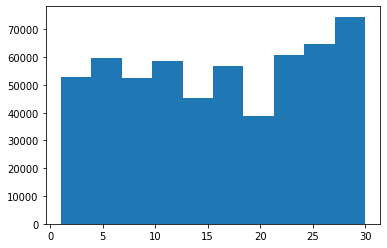

In [21]:
hist(data.dom)

(array([14546., 17474., 20701., 26714., 19521., 13445., 19550., 16188.,
        16843., 20041., 20420., 18170., 12112., 12674., 20641., 17717.,
        20973., 18074., 14602., 11017., 13162., 16975., 20346., 23352.,
        25095., 24925., 14677., 15475., 22835., 36251.]),
 array([ 1.        ,  1.96666667,  2.93333333,  3.9       ,  4.86666667,
         5.83333333,  6.8       ,  7.76666667,  8.73333333,  9.7       ,
        10.66666667, 11.63333333, 12.6       , 13.56666667, 14.53333333,
        15.5       , 16.46666667, 17.43333333, 18.4       , 19.36666667,
        20.33333333, 21.3       , 22.26666667, 23.23333333, 24.2       ,
        25.16666667, 26.13333333, 27.1       , 28.06666667, 29.03333333,
        30.        ]),
 <a list of 30 Patch objects>)

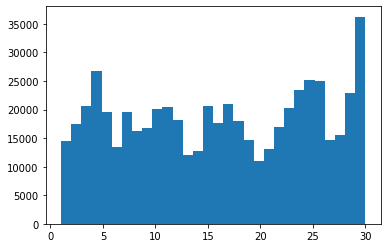

In [22]:
hist(data.dom,bins=30)

(array([14546., 17474., 20701., 26714., 19521., 13445., 19550., 16188.,
        16843., 20041., 20420., 18170., 12112., 12674., 20641., 17717.,
        20973., 18074., 14602., 11017., 13162., 16975., 20346., 23352.,
        25095., 24925., 14677., 15475., 22835., 36251.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 <a list of 30 Patch objects>)

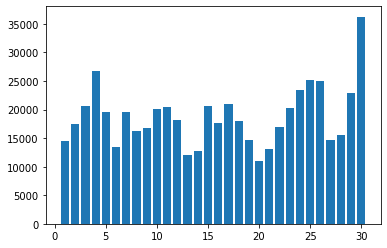

In [28]:
hist(data.dom,bins=30,rwidth=0.8,range=(0.5,30.5))

Text(0.5, 1.0, 'frequency by dom -uber- april 2014')

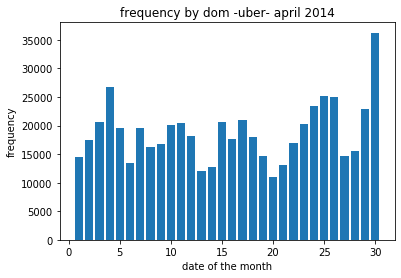

In [31]:
hist(data.dom,bins=30,rwidth=0.8,range=(0.5,30.5))
xlabel('date of the month')
ylabel('frequency')
title('frequency by dom -uber- april 2014')

# use groupby

In [37]:
for k,rows in data.groupby('dom'):
    print ([k, rows])

[1,                  Date/Time      Lat      Lon    Base  dom  weekday  hour
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512    1        1     0
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512    1        1     0
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512    1        1     0
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512    1        1     0
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512    1        1     0
...                    ...      ...      ...     ...  ...      ...   ...
554926 2014-04-01 23:21:00  40.7219 -73.9920  B02764    1        1    23
554927 2014-04-01 23:25:00  40.7261 -74.0027  B02764    1        1    23
554928 2014-04-01 23:38:00  40.7364 -73.9926  B02764    1        1    23
554929 2014-04-01 23:41:00  40.7149 -73.9405  B02764    1        1    23
554930 2014-04-01 23:46:00  40.7493 -73.9768  B02764    1        1    23

[14546 rows x 7 columns]]
[2,                  Date/Time      Lat      Lon    Base  dom  weekday  hour
1011   2014-04-0

[25,                  Date/Time      Lat      Lon    Base  dom  weekday  hour
27216  2014-04-25 00:00:00  40.7239 -74.0039  B02512   25        4     0
27217  2014-04-25 00:10:00  40.7523 -73.9953  B02512   25        4     0
27218  2014-04-25 00:10:00  40.7523 -73.9953  B02512   25        4     0
27219  2014-04-25 00:11:00  40.7518 -73.9846  B02512   25        4     0
27220  2014-04-25 00:11:00  40.7238 -74.0048  B02512   25        4     0
...                    ...      ...      ...     ...  ...      ...   ...
562589 2014-04-25 23:51:00  40.7113 -73.9474  B02764   25        4    23
562590 2014-04-25 23:52:00  40.7028 -73.9294  B02764   25        4    23
562591 2014-04-25 23:54:00  40.7238 -73.9880  B02764   25        4    23
562592 2014-04-25 23:56:00  40.7675 -73.9806  B02764   25        4    23
562593 2014-04-25 23:59:00  40.7302 -73.9996  B02764   25        4    23

[25095 rows x 7 columns]]
[26,                  Date/Time      Lat      Lon    Base  dom  weekday  hour
28626  2014-04

In [39]:
for k,rows in data.groupby('dom'):
    print ([k,len(rows)])
# this provide information of histogram

[1, 14546]
[2, 17474]
[3, 20701]
[4, 26714]
[5, 19521]
[6, 13445]
[7, 19550]
[8, 16188]
[9, 16843]
[10, 20041]
[11, 20420]
[12, 18170]
[13, 12112]
[14, 12674]
[15, 20641]
[16, 17717]
[17, 20973]
[18, 18074]
[19, 14602]
[20, 11017]
[21, 13162]
[22, 16975]
[23, 20346]
[24, 23352]
[25, 25095]
[26, 24925]
[27, 14677]
[28, 15475]
[29, 22835]
[30, 36251]


In [41]:
# another method
def count_rows(rows):
    return len(rows)
by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

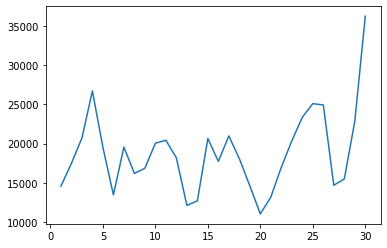

In [43]:
plot (by_date)

<BarContainer object of 30 artists>

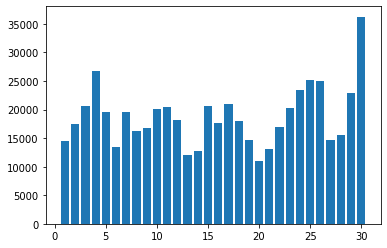

In [45]:
bar(range(1,31),by_date)

In [48]:
by_date_sorted = by_date.sort_values()
by_date_sorted
# shows variations

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

<BarContainer object of 30 artists>

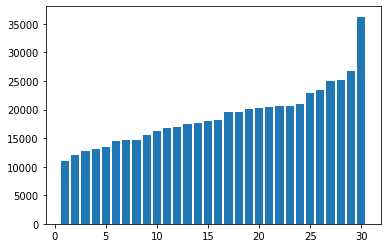

In [49]:
bar(range(1,31),by_date_sorted)

([<matplotlib.axis.XTick at 0xfa0552e3c8>,
 <a list of 30 Text xticklabel objects>)

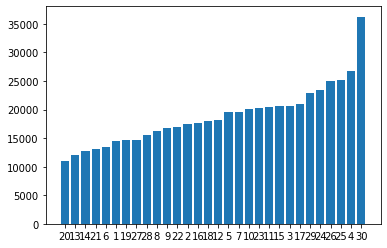

In [52]:
bar(range(1,31),by_date_sorted)
xticks(range(1,31),by_date_sorted.index)

''

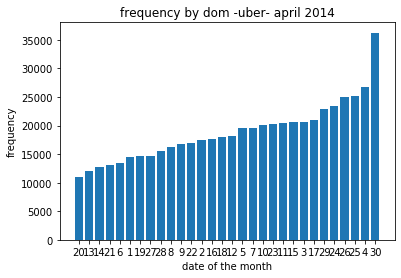

In [56]:
bar(range(1, 31),by_date_sorted)
xticks(range(1,31),by_date_sorted.index)
xlabel('date of the month')
ylabel('frequency')
title('frequency by dom -uber- april 2014')
;

# analysis by hour

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

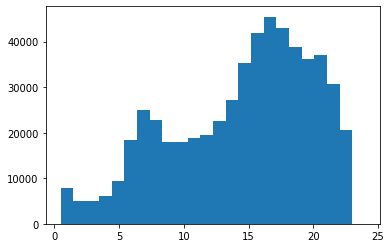

In [60]:
hist(data.hour,bins=24,range=(0.5,24))

# weekday

(array([ 60861.,  91185., 108631.,  85067.,  90303.,  77218.,  51251.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 7 Patch objects>)

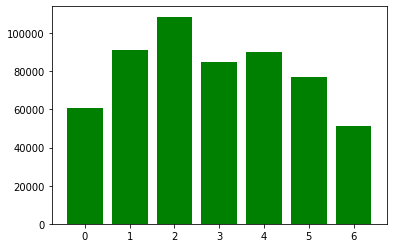

In [64]:
hist(data.weekday,bins=7,range=(-0.5,6.5),rwidth=0.8,color='green')

''

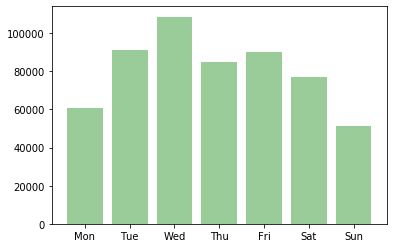

In [69]:
hist(data.weekday,bins=7,range=(-0.5,6.5),rwidth=0.8,color='green',alpha=0.4)
xticks(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split())
;

# cross analysis (hour,date of week)

In [77]:
by_h_d=data.groupby('weekday hour'.split()).apply(count_rows).unstack()
by_h_d

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


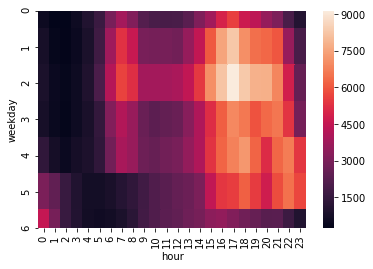

In [78]:
seaborn.heatmap(by_h_d)

# by lat and long

''

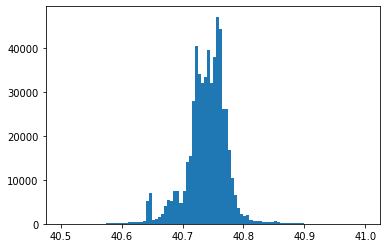

In [84]:
hist(data.Lat,bins=100,range=(40.5,41))
;

''

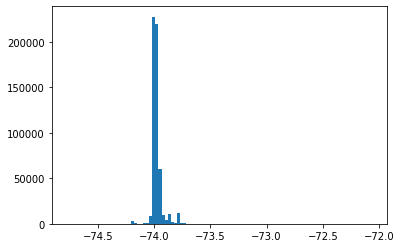

In [86]:
hist(data.Lon,bins=100)
;

''

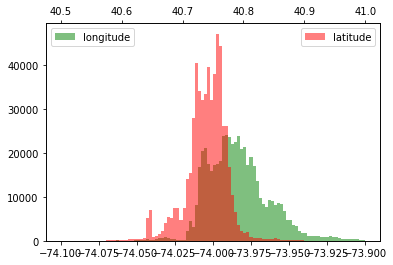

In [94]:
hist(data.Lon,bins=100,range=(-74.1,-73.9),color='g',alpha=.5,label = 'longitude')
legend(loc='upper left')
twiny()
hist(data.Lat,bins=100,range=(40.5,41),color='r',alpha=0.5,label='latitude')
legend(loc='best')

;

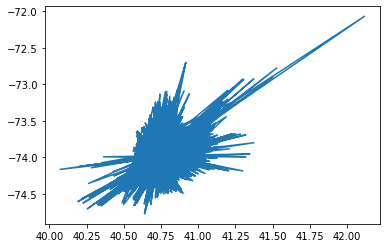

In [101]:
plot(data['Lat'],data['Lon'])

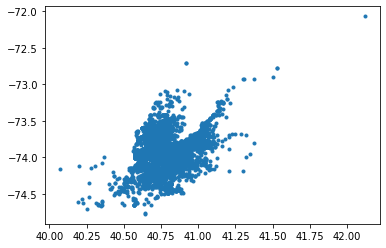

In [102]:
plot(data['Lat'],data['Lon'],'.')